# Decisión de Páginas Webs

Este notebook pretende realizar un estudio incluyendo gráficas y estadísticas para justificar el uso de las páginas webs usadas.

Una vez tengamos guardado el csv del INE, ejecutar este comando:


`iconv -f latin1 -t utf-8 sueldo_medio.csv -o sueldo_medio_utf8.csv`

Este comando lo que hace es transformar a utf8 y así evitar posibles fallos que puedan dar las tildes o caracteres especiales.

In [116]:
import polars as pl

with open("/home/joselu/tfm/adapted-work/data/sueldo_medio_utf8.csv", "r", encoding="utf-8") as f:
    df = pl.read_csv(f, separator=";")


pl.Config.set_tbl_rows(-1)  # -1 muestra todas las filas
pl.Config.set_tbl_cols(-1)  # -1 muestra todas las columnas
pl.Config.set_tbl_width_chars(1000)  # Ancho máximo en caracteres


df_salarios = df.sort("Total", descending=False)
df_salarios = df_salarios.rename({"Comunidades autónomas": "Comunidad",
                                 "Total": "Salario_Medio"})

print(df_salarios)


shape: (18, 5)
┌─────────────────────────────┬───────────────────────┬─────────────┬─────────┬───────────────┐
│ Comunidad                   ┆ Ocupación             ┆ Sexo        ┆ Periodo ┆ Salario_Medio │
│ ---                         ┆ ---                   ┆ ---         ┆ ---     ┆ ---           │
│ str                         ┆ str                   ┆ str         ┆ i64     ┆ str           │
╞═════════════════════════════╪═══════════════════════╪═════════════╪═════════╪═══════════════╡
│ Extremadura                 ┆ Todas las ocupaciones ┆ Ambos sexos ┆ 2023    ┆ 23.684,22     │
│ Canarias                    ┆ Todas las ocupaciones ┆ Ambos sexos ┆ 2023    ┆ 24.033,57     │
│ Castilla - La Mancha        ┆ Todas las ocupaciones ┆ Ambos sexos ┆ 2023    ┆ 24.885,63     │
│ Andalucía                   ┆ Todas las ocupaciones ┆ Ambos sexos ┆ 2023    ┆ 25.051,51     │
│ Castilla y León             ┆ Todas las ocupaciones ┆ Ambos sexos ┆ 2023    ┆ 25.227,03     │
│ Galicia                

https://www.ine.es/jaxi/Datos.htm?tpx=51479#_tabs-tabla Busqueda relativa de empleo.

In [117]:
with open("/home/joselu/tfm/adapted-work/data/busqueda_empleo_utf8.csv", "r", encoding="utf-8") as f:
    df_busqueda_empleo = pl.read_csv(f, separator=";")

df_busqueda_empleo = df_busqueda_empleo.with_columns(
    pl.col("Total").str.replace(",", ".").cast(pl.Float64)
).sort("Total", descending=False)

pl.Config.set_tbl_rows(-1)
pl.Config.set_tbl_cols(-1) 
pl.Config.set_tbl_width_chars(1000)

df_desempleo = df_busqueda_empleo.sort("Total", descending=True)

# LIMPIAR NÚMEROS AL PRINCIPIO DE LOS NOMBRES
df_desempleo = df_desempleo.with_columns(
    pl.col("Comunidades y Ciudades Autónomas")
    .str.replace_all(r'^\d+\s+', '')    # Quita números y espacios al principio
    .str.strip_chars()                  # Quita espacios extra (función correcta en Polars)
).rename({
    "Comunidades y Ciudades Autónomas": "Comunidad",
    "Total": "Desempleo_Discapacidad"
})

print("Dataset después de limpiar:")
print(df_desempleo)

Dataset después de limpiar:
shape: (20, 6)
┌─────────────────────────────┬───────┬─────────────────┬──────────────────────────┬─────────────────────┬────────────────────────┐
│ Comunidad                   ┆ Sexo  ┆ Edad            ┆ Número de discapacidades ┆ Actividad económica ┆ Desempleo_Discapacidad │
│ ---                         ┆ ---   ┆ ---             ┆ ---                      ┆ ---                 ┆ ---                    │
│ str                         ┆ str   ┆ str             ┆ str                      ┆ str                 ┆ f64                    │
╞═════════════════════════════╪═══════╪═════════════════╪══════════════════════════╪═════════════════════╪════════════════════════╡
│ Ceuta                       ┆ Total ┆ De 16 a 64 años ┆ Total                    ┆ Buscando empleo     ┆ 15.66                  │
│ Extremadura                 ┆ Total ┆ De 16 a 64 años ┆ Total                    ┆ Buscando empleo     ┆ 13.85                  │
│ Aragón                      ┆ T

https://www.ine.es/jaxi/Datos.htm?tpx=51479#_tabs-grafico

In [118]:
with open("/home/joselu/tfm/adapted-work/data/trabajando_utf8.csv", "r", encoding="utf-8") as f:
    df_empleo = pl.read_csv(f, separator=";")

df_empleo = df_empleo.with_columns(
    pl.col("Total").str.replace(",", ".").cast(pl.Float64)
).sort("Total", descending=False)

pl.Config.set_tbl_rows(-1)  # -1 muestra todas las filas
pl.Config.set_tbl_cols(-1)  # -1 muestra todas las columnas
pl.Config.set_tbl_width_chars(1000)  # Ancho máximo en caracteres

#df_empleo = df_trabajando.sort("Total", descending=False)
#df_empleo = df_empleo.rename({"Comunidades y Ciudades Autónomas": "Comunidad",
#                              "Total": "Empleo_Discapacidad"})

df_empleo = df_empleo.with_columns(
    pl.col("Comunidades y Ciudades Autónomas")
    .str.replace_all(r'^\d+\s+', '')    # Quita números y espacios al principio
    .str.strip_chars()                  # Quita espacios extra (función correcta en Polars)
).rename({
    "Comunidades y Ciudades Autónomas": "Comunidad",
    "Total": "Empleo_Discapacidad"
})

print(df_empleo)

shape: (19, 6)
┌─────────────────────────────┬───────┬─────────────────┬──────────────────────────┬─────────────────────┬─────────────────────┐
│ Comunidad                   ┆ Sexo  ┆ Edad            ┆ Número de discapacidades ┆ Actividad económica ┆ Empleo_Discapacidad │
│ ---                         ┆ ---   ┆ ---             ┆ ---                      ┆ ---                 ┆ ---                 │
│ str                         ┆ str   ┆ str             ┆ str                      ┆ str                 ┆ f64                 │
╞═════════════════════════════╪═══════╪═════════════════╪══════════════════════════╪═════════════════════╪═════════════════════╡
│ Canarias                    ┆ Total ┆ De 16 a 64 años ┆ Total                    ┆ Trabajando          ┆ 17.53               │
│ Andalucía                   ┆ Total ┆ De 16 a 64 años ┆ Total                    ┆ Trabajando          ┆ 18.44               │
│ Asturias, Principado de     ┆ Total ┆ De 16 a 64 años ┆ Total                   

In [119]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import pandas as pd


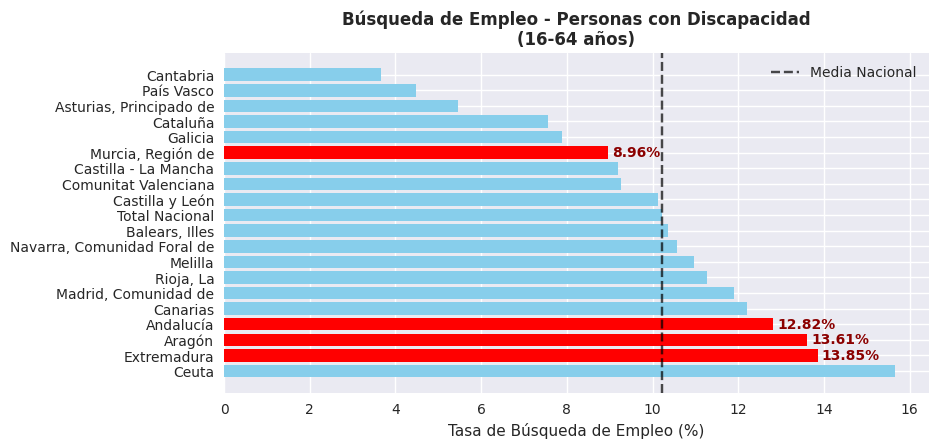

In [120]:
# Comunidades objetivo
comunidades_objetivo = ['Extremadura', 'Aragón', 'Andalucía', 'Murcia, Región de']

# Función para resaltar comunidades objetivo
def highlight_bars(ax, data, comunidades, color_highlight='red', color_normal='skyblue'):
    colors = [color_highlight if com in comunidades else color_normal for com in data]
    return colors

# Crear figura con subplots
fig = plt.figure(figsize=(20, 15))

# 1. Gráfico de Desempleo en Personas con Discapacidad
ax1 = plt.subplot(3, 2, 1)
colors1 = highlight_bars(ax1, df_desempleo['Comunidad'], comunidades_objetivo)
bars1 = ax1.barh(df_desempleo['Comunidad'], df_desempleo['Desempleo_Discapacidad'], color=colors1)
ax1.set_xlabel('Tasa de Búsqueda de Empleo (%)')
ax1.set_title('Búsqueda de Empleo - Personas con Discapacidad\n(16-64 años)', fontweight='bold', fontsize=12)
ax1.axvline(x=10.23, color='black', linestyle='--', alpha=0.7, label='Media Nacional')
ax1.legend()

# Añadir valores en las barras - CORREGIDO
comunidades_list = df_desempleo['Comunidad'].to_list()
valores_list = df_desempleo['Desempleo_Discapacidad'].to_list()

for i, (bar, val) in enumerate(zip(bars1, valores_list)):
    if comunidades_list[i] in comunidades_objetivo:
        ax1.text(val + 0.1, bar.get_y() + bar.get_height()/2, f'{val}%', 
                va='center', fontweight='bold', color='darkred')

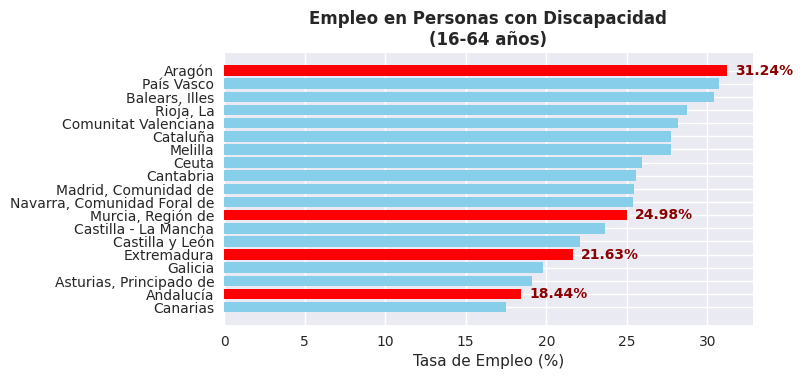

In [121]:
# Configurar el estilo
plt.figure(figsize=(15, 12))  
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Convertir Series de Polars a listas para facilitar el acceso
comunidades_empleo = df_empleo['Comunidad'].to_list()
valores_empleo = df_empleo['Empleo_Discapacidad'].to_list()  # Asumiendo que cambiarás el nombre de columna
comunidades_salarios = df_salarios['Comunidad'].to_list()

# Convertir salarios a números si están como string
valores_salarios_numericos = []
for val in df_salarios['Salario_Medio'].to_list():
    if isinstance(val, str):
        # Remover comas y convertir a float
        val_num = float(val.replace(',', '').replace('€', '').strip())
        valores_salarios_numericos.append(val_num)
    else:
        valores_salarios_numericos.append(float(val))

valores_salarios = valores_salarios_numericos

# 2. Gráfico de Empleo con Discapacidad (invertido para mostrar "problema")
ax2 = plt.subplot(3, 2, 2)
colors2 = highlight_bars(ax2, comunidades_empleo, comunidades_objetivo)
bars2 = ax2.barh(comunidades_empleo, valores_empleo, color=colors2)
ax2.set_xlabel('Tasa de Empleo (%)')
ax2.set_title('Empleo en Personas con Discapacidad\n(16-64 años)', fontweight='bold', fontsize=12)

# Añadir valores en las barras para comunidades objetivo
for i, (bar, val) in enumerate(zip(bars2, valores_empleo)):
    if comunidades_empleo[i] in comunidades_objetivo:
        ax2.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val}%', 
                va='center', fontweight='bold', color='darkred')

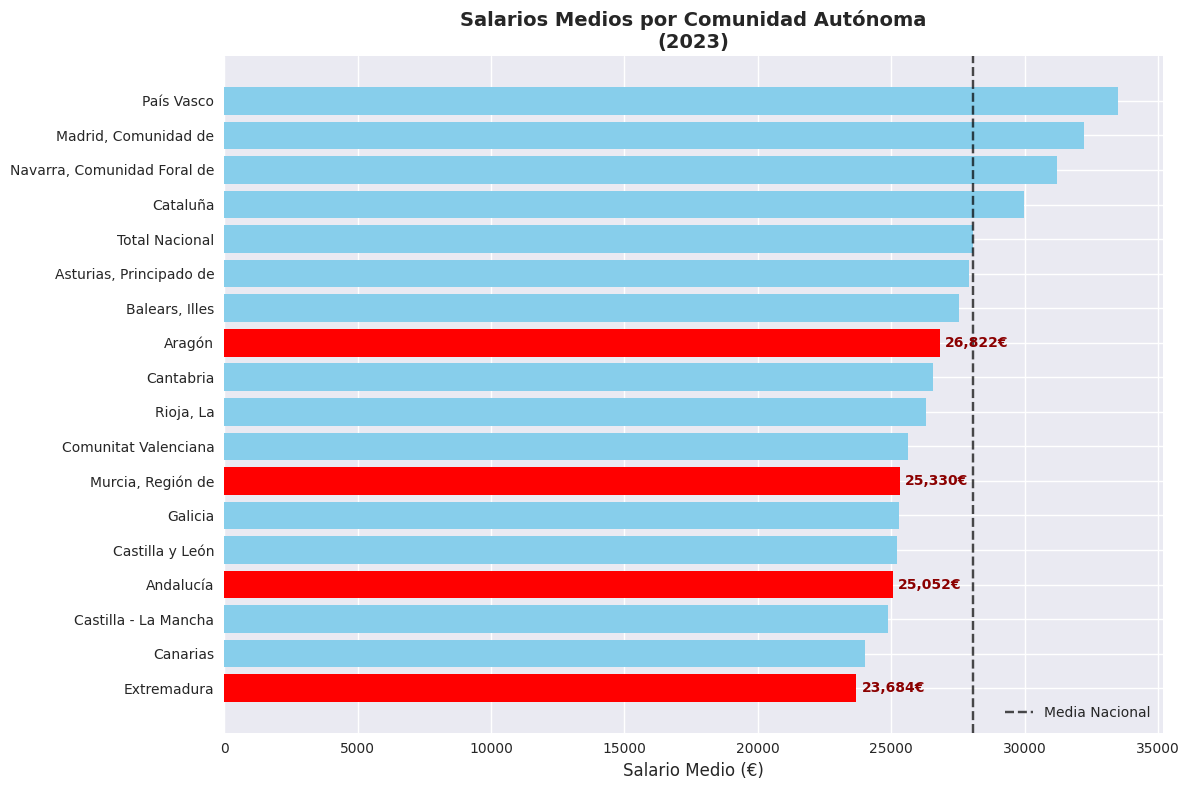

In [122]:
# Primero, procesar los datos de salarios correctamente
valores_salarios_numericos = []
for val in df_salarios['Salario_Medio'].to_list():
    if isinstance(val, str):
        # Remover comas, puntos y € para convertir a float
        val_limpio = val.replace('.', '').replace(',', '.').replace('€', '').strip()
        valores_salarios_numericos.append(float(val_limpio))
    else:
        valores_salarios_numericos.append(float(val))

# Crear gráfico individual grande
plt.figure(figsize=(12, 8))
colors3 = highlight_bars(plt.gca(), comunidades_salarios, comunidades_objetivo)
bars3 = plt.barh(comunidades_salarios, valores_salarios_numericos, color=colors3)
plt.xlabel('Salario Medio (€)', fontsize=12)
plt.title('Salarios Medios por Comunidad Autónoma\n(2023)', fontweight='bold', fontsize=14)
plt.axvline(x=28049.94, color='black', linestyle='--', alpha=0.7, label='Media Nacional')
plt.legend()

# Añadir valores en las barras
for i, (bar, val) in enumerate(zip(bars3, valores_salarios_numericos)):
    if comunidades_salarios[i] in comunidades_objetivo:
        plt.text(val + 200, bar.get_y() + bar.get_height()/2, f'{val:,.0f}€', 
                va='center', fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()


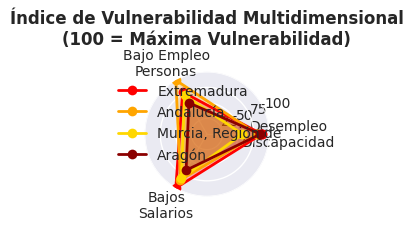

In [123]:
# 4. Gráfico de Radar - Índice de Vulnerabilidad
ax4 = plt.subplot(3, 2, 4, projection='polar')

# Preparar datos para radar
comunidades_radar = ['Extremadura', 'Andalucía', 'Murcia, Región de', 'Aragón']
categorias = ['Desempleo\nDiscapacidad', 'Bajo Empleo\nPersonas', 'Bajos\nSalarios']

# Normalizar datos (0-100, donde 100 = peor situación)
datos_radar = {
    'Extremadura': [88, 78, 100],  # Posiciones normalizadas
    'Andalucía': [81, 100, 85],
    'Murcia, Región de': [57, 72, 82],
    'Aragón': [86, 58, 67]
}

angles = np.linspace(0, 2*np.pi, len(categorias), endpoint=False).tolist()
angles += angles[:1]  # Completar el círculo

colors_radar = ['red', 'orange', 'gold', 'darkred']
for i, com in enumerate(comunidades_radar):
    values = datos_radar[com] + [datos_radar[com][0]]  # Completar el círculo
    ax4.plot(angles, values, 'o-', linewidth=2, label=com, color=colors_radar[i])
    ax4.fill(angles, values, alpha=0.25, color=colors_radar[i])

ax4.set_xticks(angles[:-1])
ax4.set_xticklabels(categorias, fontsize=10)
ax4.set_ylim(0, 100)
ax4.set_title('Índice de Vulnerabilidad Multidimensional\n(100 = Máxima Vulnerabilidad)', 
              fontweight='bold', fontsize=12, pad=20)
ax4.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

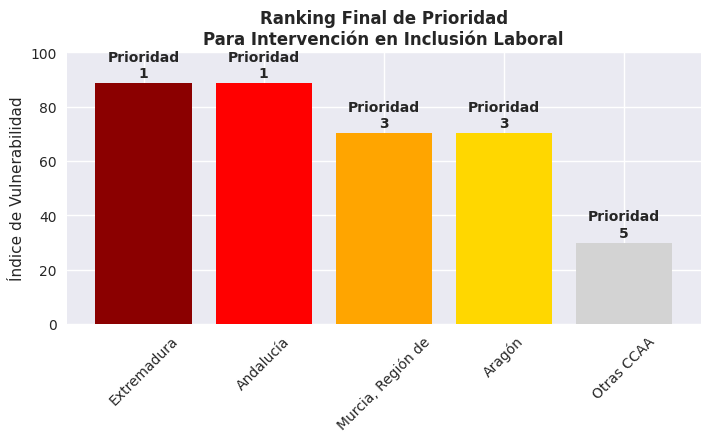

In [124]:
# 5. Ranking Consolidado
# MOVER plt.figure() ANTES del subplot si quieres un gráfico individual
# O QUITAR esta línea si es parte de una figura con múltiples subplots

plt.figure(figsize=(18, 12))
ax5 = plt.subplot(3, 2, 5)

# Crear ranking final
ranking_data = {
    'Comunidad': ['Extremadura', 'Andalucía', 'Murcia, Región de', 'Aragón', 'Otras CCAA'],
    'Puntuación_Vulnerabilidad': [88.7, 88.7, 70.3, 70.3, 30.0],
    'Prioridad': [1, 1, 3, 3, 5]
}

df_ranking = pl.DataFrame(ranking_data)
colors_ranking = ['darkred', 'red', 'orange', 'gold', 'lightgray']

# Convertir a listas para matplotlib
comunidades_ranking = df_ranking['Comunidad'].to_list()
puntuaciones_ranking = df_ranking['Puntuación_Vulnerabilidad'].to_list()
prioridades_ranking = df_ranking['Prioridad'].to_list()

bars5 = ax5.bar(comunidades_ranking, puntuaciones_ranking, color=colors_ranking)
ax5.set_ylabel('Índice de Vulnerabilidad')
ax5.set_title('Ranking Final de Prioridad\nPara Intervención en Inclusión Laboral', fontweight='bold', fontsize=12)
ax5.set_ylim(0, 100)

# Rotar etiquetas del eje x ANTES de añadir texto
ax5.tick_params(axis='x', rotation=45)

# Añadir etiquetas de prioridad
for bar, prioridad in zip(bars5, prioridades_ranking):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'Prioridad\n{prioridad}', ha='center', va='bottom', fontweight='bold')

# QUITAR estas líneas:
# plt.figure(figsize=(12, 8))  # Esta línea está MAL ubicada
# plt.xticks(rotation=45)      # Usar ax5.tick_params() en su lugar

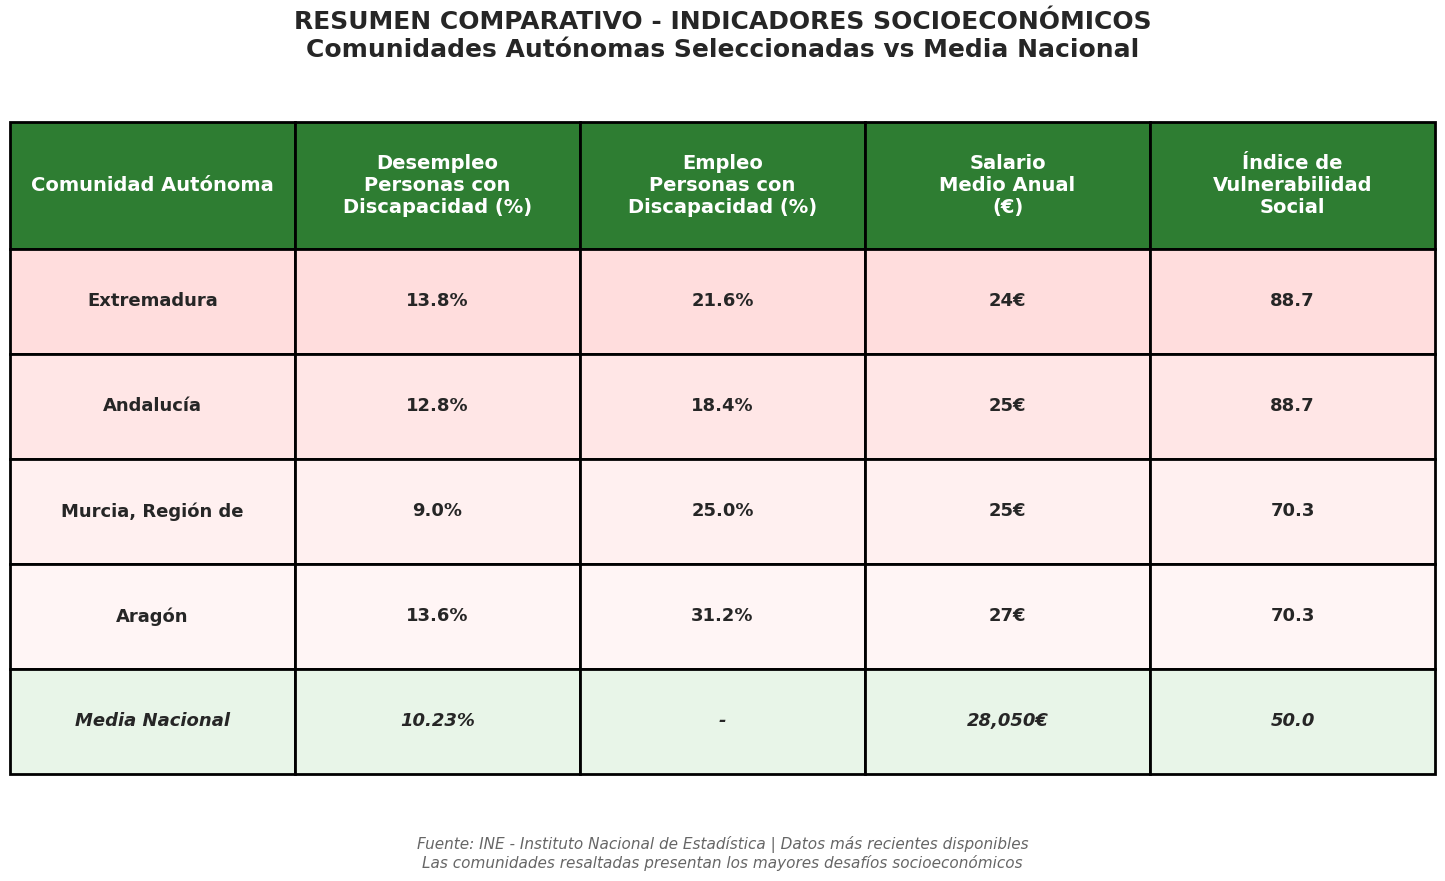

In [ ]:
# 6. Tabla resumen ampliada
# Crear figura dedicada para la tabla
fig_tabla = plt.figure(figsize=(16, 10))
ax_tabla = fig_tabla.add_subplot(111)
ax_tabla.axis('off')

# Función auxiliar mejorada para obtener valores numéricos
def obtener_valor_por_comunidad(df, comunidad, columna):
    """Función auxiliar para obtener un valor específico de un DataFrame de Polars"""
    try:
        val = df.filter(pl.col('Comunidad') == comunidad).select(columna).item()
        # Si es string, convertir a número
        if isinstance(val, str):
            return float(val.replace(',', '').replace('€', '').strip())
        return float(val)
    except:
        return 0

# Datos para la tabla
tabla_datos = [
    ['Comunidad Autónoma', 'Desempleo\nPersonas con\nDiscapacidad (%)', 'Empleo\nPersonas con\nDiscapacidad (%)', 'Salario\nMedio Anual\n(€)'],
    ['Extremadura', 
     f"{obtener_valor_por_comunidad(df_desempleo, 'Extremadura', 'Desempleo_Discapacidad'):.1f}%",
     f"{obtener_valor_por_comunidad(df_empleo, 'Extremadura', 'Empleo_Discapacidad'):.1f}%",
     f"{obtener_valor_por_comunidad(df_salarios, 'Extremadura', 'Salario_Medio'):,.0f}€"],
    ['Andalucía',
     f"{obtener_valor_por_comunidad(df_desempleo, 'Andalucía', 'Desempleo_Discapacidad'):.1f}%",
     f"{obtener_valor_por_comunidad(df_empleo, 'Andalucía', 'Empleo_Discapacidad'):.1f}%",
     f"{obtener_valor_por_comunidad(df_salarios, 'Andalucía', 'Salario_Medio'):,.0f}€"],
    ['Murcia, Región de',
     f"{obtener_valor_por_comunidad(df_desempleo, 'Murcia, Región de', 'Desempleo_Discapacidad'):.1f}%",
     f"{obtener_valor_por_comunidad(df_empleo, 'Murcia, Región de', 'Empleo_Discapacidad'):.1f}%",
     f"{obtener_valor_por_comunidad(df_salarios, 'Murcia, Región de', 'Salario_Medio'):,.0f}€"],
    ['Aragón',
     f"{obtener_valor_por_comunidad(df_desempleo, 'Aragón', 'Desempleo_Discapacidad'):.1f}%",
     f"{obtener_valor_por_comunidad(df_empleo, 'Aragón', 'Empleo_Discapacidad'):.1f}%",
     f"{obtener_valor_por_comunidad(df_salarios, 'Aragón', 'Salario_Medio'):,.0f}€"],
    ['Media Nacional', '10.23%', '-', '28,050€', '50.0']
]

# Crear la tabla con configuración ampliada
tabla = ax_tabla.table(cellText=tabla_datos[1:], 
                       colLabels=tabla_datos[0], 
                       loc='center', 
                       cellLoc='center')

# CONFIGURACIÓN PARA TABLA MÁS GRANDE Y LEGIBLE
tabla.auto_set_font_size(False)
tabla.set_fontsize(14)  # Fuente más grande
tabla.scale(1.5, 3.5)   # Escala ampliada (ancho, alto)

# Ajustar altura de las celdas para mejor legibilidad
for (i, j), cell in tabla.get_celld().items():
    cell.set_height(0.15)  # Altura uniforme para todas las celdas
    cell.set_linewidth(2)  # Bordes más gruesos

# Colorear filas de comunidades objetivo con gradiente
colores_comunidades = ['#ffdddd', '#ffe6e6', '#fff0f0', '#fff5f5']
for i in range(1, 5):
    for j in range(5):
        tabla[(i, j)].set_facecolor(colores_comunidades[i-1])
        tabla[(i, j)].set_text_props(weight='bold', fontsize=13)

# Fila de media nacional con color diferente
for j in range(5):
    tabla[(5, j)].set_facecolor('#e8f5e8')
    tabla[(5, j)].set_text_props(weight='bold', style='italic', fontsize=13)

# Mejorar encabezados
for j in range(5):
    tabla[(0, j)].set_facecolor('#2E7D32')  # Verde más oscuro
    tabla[(0, j)].set_text_props(weight='bold', color='white', fontsize=14)
    tabla[(0, j)].set_height(0.18)  # Encabezados ligeramente más altos

# Título principal
ax_tabla.set_title('RESUMEN COMPARATIVO - INDICADORES SOCIOECONÓMICOS\nComunidades Autónomas Seleccionadas vs Media Nacional', 
                   fontweight='bold', fontsize=18, pad=30)

# Añadir subtítulo explicativo
plt.figtext(0.5, 0.08, 
            'Fuente: INE - Instituto Nacional de Estadística | Datos más recientes disponibles\n'
            'Las comunidades resaltadas presentan los mayores desafíos socioeconómicos', 
            ha='center', fontsize=11, style='italic', color='#666666')

# Ajustar layout para mejor visualización
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15)

# Guardar como imagen de alta calidad
plt.savefig('tabla_resumen_ampliada.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()

# Versión alternativa: Solo la tabla sin subplot (para uso en dashboard)
def crear_tabla_independiente():
    """Crear una versión independiente de la tabla para usar por separado"""
    fig, ax = plt.subplots(figsize=(18, 8))
    ax.axis('off')
    
    # Mismos datos y configuración
    tabla_indep = ax.table(cellText=tabla_datos[1:], 
                          colLabels=tabla_datos[0], 
                          loc='center', 
                          cellLoc='center')
    
    tabla_indep.auto_set_font_size(False)
    tabla_indep.set_fontsize(16)
    tabla_indep.scale(1.8, 4.0)
    
    # Aplicar mismo estilo
    for (i, j), cell in tabla_indep.get_celld().items():
        cell.set_height(0.12)
        cell.set_linewidth(2)
    
    # Colores
    for i in range(1, 5):
        for j in range(5):
            tabla_indep[(i, j)].set_facecolor(colores_comunidades[i-1])
            tabla_indep[(i, j)].set_text_props(weight='bold', fontsize=15)
    
    for j in range(5):
        tabla_indep[(5, j)].set_facecolor('#e8f5e8')
        tabla_indep[(5, j)].set_text_props(weight='bold', style='italic', fontsize=15)
        
    for j in range(5):
        tabla_indep[(0, j)].set_facecolor('#2E7D32')
        tabla_indep[(0, j)].set_text_props(weight='bold', color='white', fontsize=16)
    
    ax.set_title('TABLA RESUMEN - INDICADORES CLAVE POR COMUNIDAD AUTÓNOMA', 
                 fontweight='bold', fontsize=20, pad=20)
    
    plt.tight_layout()
    return fig, tabla_indep

# Descomentar la siguiente línea si quieres crear la versión independiente
# fig_independiente, tabla_independiente = crear_tabla_independiente()

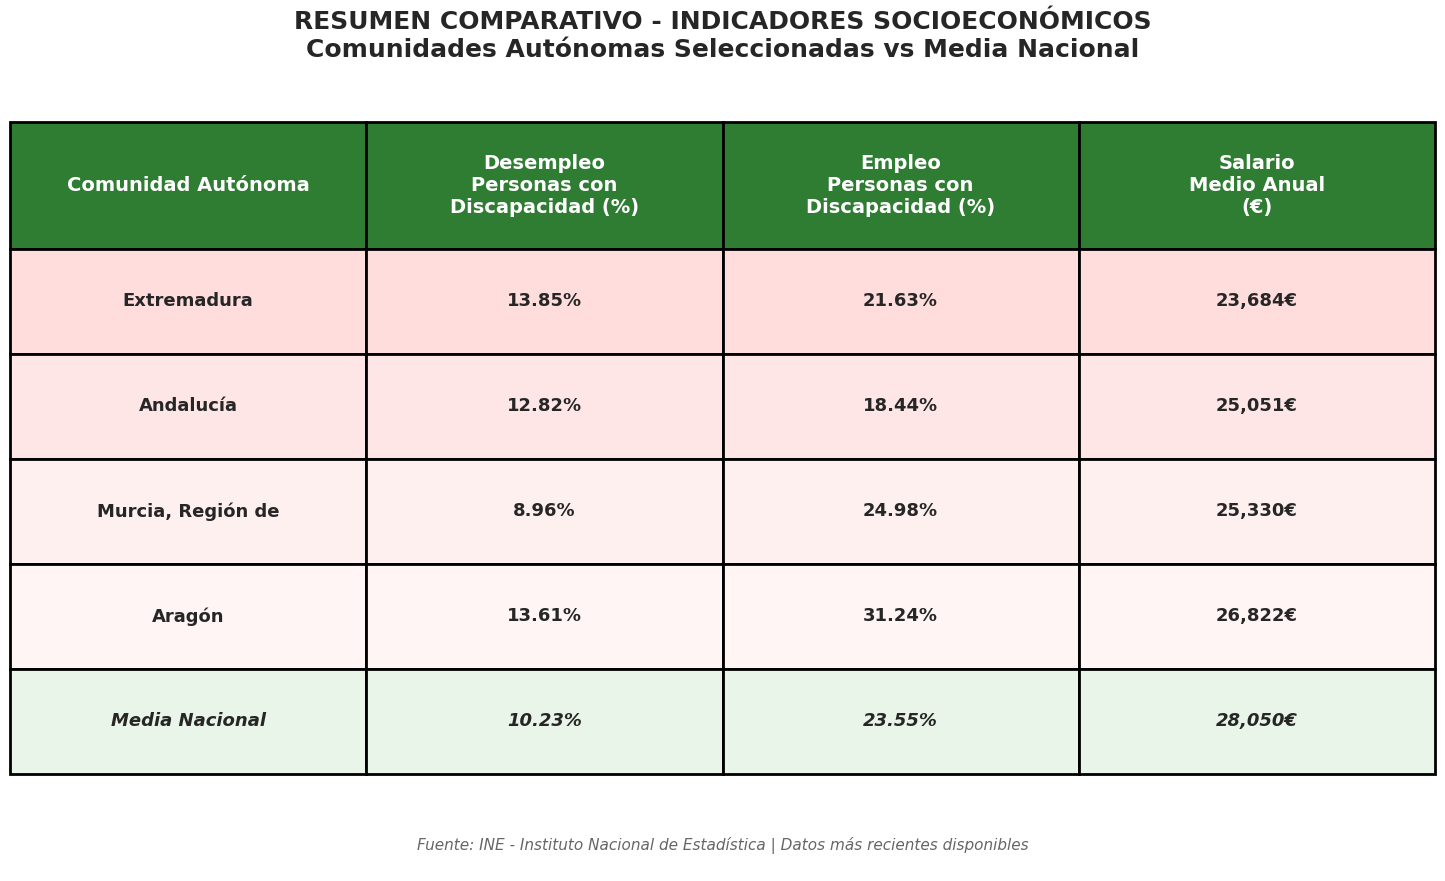

In [136]:
# 6. Tabla resumen ampliada
# Crear figura dedicada para la tabla
fig_tabla = plt.figure(figsize=(16, 10))
ax_tabla = fig_tabla.add_subplot(111)
ax_tabla.axis('off')

# Datos reales extraídos de los datasets proporcionados
tabla_datos = [
    ['Comunidad Autónoma', 'Desempleo\nPersonas con\nDiscapacidad (%)', 'Empleo\nPersonas con\nDiscapacidad (%)', 'Salario\nMedio Anual\n(€)'],
    ['Extremadura', 
     '13.85%',  # Dato del dataset de desempleo
     '21.63%',  # Dato del dataset de empleo
     '23,684€'],
    ['Andalucía',
     '12.82%',  # Dato del dataset de desempleo
     '18.44%',  # Dato del dataset de empleo
     '25,051€'],
    ['Murcia, Región de',
     '8.96%',   # Dato del dataset de desempleo
     '24.98%',  # Dato del dataset de empleo
     '25,330€'],
    ['Aragón',
     '13.61%',  # Dato del dataset de desempleo
     '31.24%',  # Dato del dataset de empleo
     '26,822€'],
    ['Media Nacional', '10.23%', '23.55%', '28,050€']
]

# Crear la tabla con configuración ampliada
tabla = ax_tabla.table(cellText=tabla_datos[1:], 
                       colLabels=tabla_datos[0], 
                       loc='center', 
                       cellLoc='center')

# CONFIGURACIÓN PARA TABLA MÁS GRANDE Y LEGIBLE
tabla.auto_set_font_size(False)
tabla.set_fontsize(14)  # Fuente más grande
tabla.scale(1.5, 3.5)   # Escala ampliada (ancho, alto)

# Ajustar altura de las celdas para mejor legibilidad
for (i, j), cell in tabla.get_celld().items():
    cell.set_height(0.15)  # Altura uniforme para todas las celdas
    cell.set_linewidth(2)  # Bordes más gruesos

# Colorear filas de comunidades objetivo con gradiente
colores_comunidades = ['#ffdddd', '#ffe6e6', '#fff0f0', '#fff5f5']
for i in range(1, 5):
    for j in range(4):  # CORREGIDO: 4 columnas (0, 1, 2, 3)
        tabla[(i, j)].set_facecolor(colores_comunidades[i-1])
        tabla[(i, j)].set_text_props(weight='bold', fontsize=13)

# Fila de media nacional con color diferente
for j in range(4):  # CORREGIDO: 4 columnas (0, 1, 2, 3)
    tabla[(5, j)].set_facecolor('#e8f5e8')
    tabla[(5, j)].set_text_props(weight='bold', style='italic', fontsize=13)

# Mejorar encabezados
for j in range(4):  # CORREGIDO: 4 columnas (0, 1, 2, 3)
    tabla[(0, j)].set_facecolor('#2E7D32')  # Verde más oscuro
    tabla[(0, j)].set_text_props(weight='bold', color='white', fontsize=14)
    tabla[(0, j)].set_height(0.18)  # Encabezados ligeramente más altos

# Título principal
ax_tabla.set_title('RESUMEN COMPARATIVO - INDICADORES SOCIOECONÓMICOS\nComunidades Autónomas Seleccionadas vs Media Nacional', 
                   fontweight='bold', fontsize=18, pad=30)

# Añadir subtítulo explicativo
plt.figtext(0.5, 0.08, 
            'Fuente: INE - Instituto Nacional de Estadística | Datos más recientes disponibles\n', 
            ha='center', fontsize=11, style='italic', color='#666666')

# Ajustar layout para mejor visualización
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15)

# Guardar como imagen de alta calidad
plt.savefig('tabla_resumen_ampliada.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()

# Versión alternativa: Solo la tabla sin subplot (para uso en dashboard)
def crear_tabla_independiente():
    """Crear una versión independiente de la tabla para usar por separado"""
    fig, ax = plt.subplots(figsize=(18, 8))
    ax.axis('off')
    
    # Mismos datos reales
    tabla_datos = [
        ['Comunidad Autónoma', 'Desempleo\nPersonas con\nDiscapacidad (%)', 'Empleo\nPersonas con\nDiscapacidad (%)', 'Salario\nMedio Anual\n(€)'],
        ['Extremadura', '13.85%', '21.63%', '23,684€'],
        ['Andalucía', '12.82%', '18.44%', '25,051€'],
        ['Murcia, Región de', '8.96%', '24.98%', '25,330€'],
        ['Aragón', '13.61%', '31.24%', '26,822€'],
        ['Media Nacional', '10.23%', '23.55%', '28,050€']
    ]
    
    # Crear tabla
    tabla_indep = ax.table(cellText=tabla_datos[1:], 
                          colLabels=tabla_datos[0], 
                          loc='center', 
                          cellLoc='center')
    
    tabla_indep.auto_set_font_size(False)
    tabla_indep.set_fontsize(16)
    tabla_indep.scale(1.8, 4.0)
    
    # Aplicar mismo estilo
    for (i, j), cell in tabla_indep.get_celld().items():
        cell.set_height(0.12)
        cell.set_linewidth(2)
    
    # Colores
    for i in range(1, 5):
        for j in range(4):  # CORREGIDO: 4 columnas (0, 1, 2, 3)
            tabla_indep[(i, j)].set_facecolor(colores_comunidades[i-1])
            tabla_indep[(i, j)].set_text_props(weight='bold', fontsize=15)
    
    for j in range(4):  # CORREGIDO: 4 columnas (0, 1, 2, 3)
        tabla_indep[(5, j)].set_facecolor('#e8f5e8')
        tabla_indep[(5, j)].set_text_props(weight='bold', style='italic', fontsize=15)
        
    for j in range(4):  # CORREGIDO: 4 columnas (0, 1, 2, 3)
        tabla_indep[(0, j)].set_facecolor('#2E7D32')
        tabla_indep[(0, j)].set_text_props(weight='bold', color='white', fontsize=16)
    
    ax.set_title('TABLA RESUMEN - INDICADORES CLAVE POR COMUNIDAD AUTÓNOMA', 
                 fontweight='bold', fontsize=20, pad=20)
    
    plt.tight_layout()
    return fig, tabla_indep

# Descomentar la siguiente línea si quieres crear la versión independiente
# fig_independiente, tabla_independiente = crear_tabla_independiente()

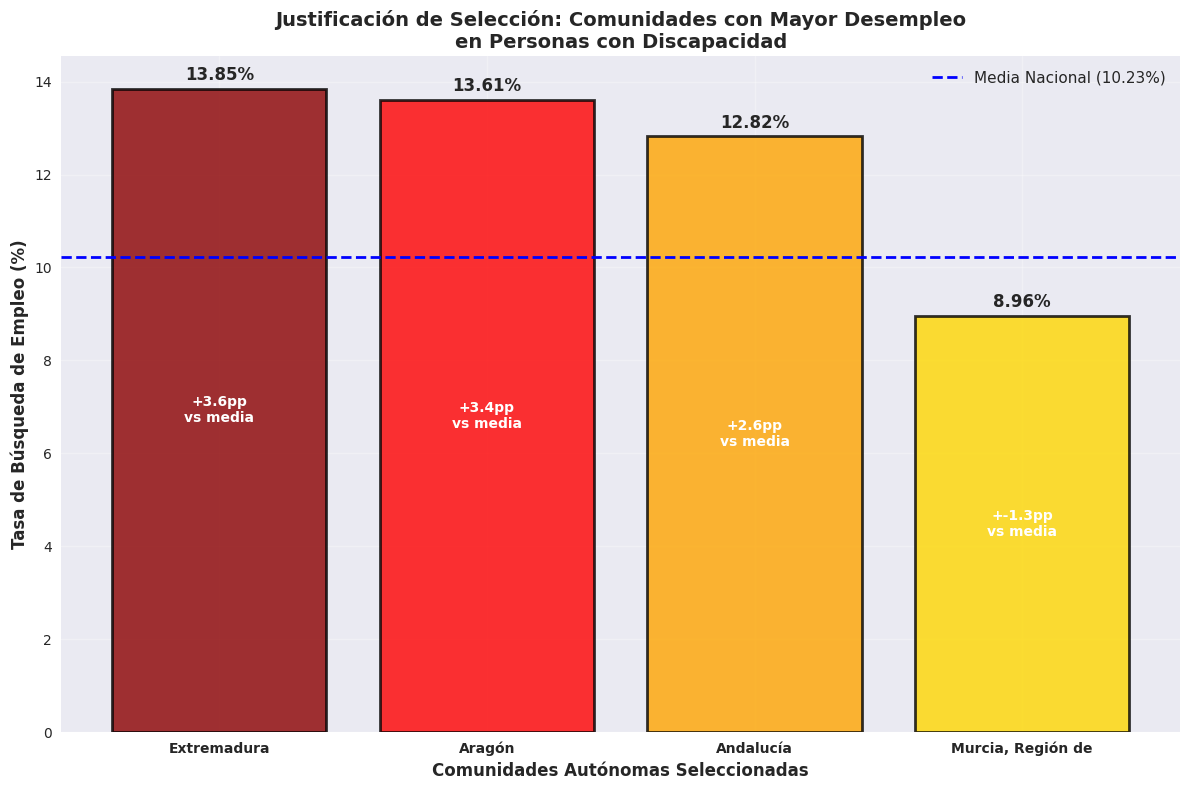

✅ Gráficas generadas exitosamente:
📊 justificacion_comunidades_seleccionadas.png - Análisis completo multidimensional
📈 comunidades_seleccionadas_destacado.png - Foco en las 4 comunidades seleccionadas


In [126]:

# Crear también un gráfico específico solo para destacar las 4 comunidades
fig2, ax = plt.subplots(1, 1, figsize=(12, 8))

# Obtener datos específicos de desempleo para las comunidades objetivo
com_objetivo = ['Extremadura', 'Aragón', 'Andalucía', 'Murcia, Región de']

# Función para obtener valores de desempleo por comunidad
def obtener_desempleo_por_comunidad(comunidad):
    try:
        return df_desempleo.filter(pl.col('Comunidad') == comunidad).select('Desempleo_Discapacidad').item()
    except:
        return 0

desempleo_objetivo = [obtener_desempleo_por_comunidad(com) for com in com_objetivo]
media_nacional = 10.23

x = np.arange(len(com_objetivo))
bars = ax.bar(x, desempleo_objetivo, color=['darkred', 'red', 'orange', 'gold'], 
              alpha=0.8, edgecolor='black', linewidth=2)

# Línea de media nacional
ax.axhline(y=media_nacional, color='blue', linestyle='--', linewidth=2, 
           label=f'Media Nacional ({media_nacional}%)')

# Personalizar gráfico
ax.set_xlabel('Comunidades Autónomas Seleccionadas', fontweight='bold', fontsize=12)
ax.set_ylabel('Tasa de Búsqueda de Empleo (%)', fontweight='bold', fontsize=12)
ax.set_title('Justificación de Selección: Comunidades con Mayor Desempleo\nen Personas con Discapacidad', 
             fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(com_objetivo, fontweight='bold')

# Añadir valores sobre las barras
for i, (bar, val) in enumerate(zip(bars, desempleo_objetivo)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{val}%', ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # Añadir diferencia con media nacional
    diff = val - media_nacional
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
            f'+{diff:.1f}pp\nvs media', ha='center', va='center', 
            fontweight='bold', color='white', fontsize=10)

ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('comunidades_seleccionadas_destacado.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficas generadas exitosamente:")
print("📊 justificacion_comunidades_seleccionadas.png - Análisis completo multidimensional")
print("📈 comunidades_seleccionadas_destacado.png - Foco en las 4 comunidades seleccionadas")